### imports 

In [15]:
if 'google.colab' in str(get_ipython()):
    remote_flag = 1
    !pip install mnist
    from google.colab import files
    from google.colab import drive
    drive.mount('/content/gdrive')
else:
    remote_flag = 0
    from six.moves import urllib    
    opener = urllib.request.build_opener()
    opener.addheaders = [('User-agent', 'Mozilla/5.0')]
    urllib.request.install_opener(opener)

import ModuleGenFlow as genflow
import operationUtils as op
import mnist
import numpy as np
import pickle
import time

from matplotlib import pyplot as plt
from matplotlib import colors


### data preprocessing

In [2]:
x_train = mnist.train_images()
y_train = mnist.train_labels()
### equaly sample all labels ###
labels = np.unique(y_train)
n_per_label = 1000
x_train_sampled = np.zeros([len(labels)*n_per_label, x_train.shape[1],x_train.shape[2]])
for k in labels:
  curr_label_data = x_train[(y_train == labels[k]),:,:]
  sample_idcs = np.random.choice(np.arange(curr_label_data.shape[0]), n_per_label, replace=False)
  samples_per_label = curr_label_data[sample_idcs,:,:]
  x_train_sampled[k*n_per_label:(k+1)*n_per_label, :,:] = samples_per_label

del x_train
del y_train


## Choose model architecture

In [3]:
# set num of model latent samples
n_samples = 1000 # max 10000
# create empty model objectb
model = genflow.GenFlow(n_gen_samples=n_samples)
# set architecture
arch = 1 # 1, 2, 3, 4

## Architecture 1 - "Original"

In [4]:
if arch == 1:

  # scale 7x7
  model.add_layer(genflow.Linear(features_dim=7*7, poly_deg=5, n_iter=400))
  model.add_layer(genflow.Conv(features_dim=7*7, kernel_dim=5, poly_deg=4, n_iter=200))
  model.add_layer(genflow.Conv(features_dim=7*7, kernel_dim=3, poly_deg=3, n_iter=200))

  # scale 14x14
  model.add_layer(genflow.Linear(features_dim=14*14, poly_deg=6, n_iter=400))
  model.add_layer(genflow.Conv(features_dim=14*14, kernel_dim=7, poly_deg=5, n_iter=200))
  model.add_layer(genflow.Conv(features_dim=14*14, kernel_dim=5, poly_deg=4, n_iter=200))

  # scale 21x21
  model.add_layer(genflow.Linear(features_dim=21*21, poly_deg=7, n_iter=200))
  model.add_layer(genflow.Conv(features_dim=21*21, kernel_dim=7, poly_deg=5, n_iter=200))
  model.add_layer(genflow.Conv(features_dim=21*21, kernel_dim=5, poly_deg=4, n_iter=200))
  model.add_layer(genflow.Conv(features_dim=21*21, kernel_dim=3, poly_deg=3, n_iter=200))

  # scale 28x28
  model.add_layer(genflow.Linear(features_dim=28*28, poly_deg=6, n_iter=200))
  model.add_layer(genflow.Conv(features_dim=28*28, kernel_dim=7, poly_deg=5, n_iter=200))
  model.add_layer(genflow.Conv(features_dim=28*28, kernel_dim=5, poly_deg=4, n_iter=200))
  model.add_layer(genflow.Conv(features_dim=28*28, kernel_dim=3, poly_deg=3, n_iter=200))

  scales_sizes = (3, 3, 4, 4)

## Architecture 2 - fully linear Long

In [5]:
if arch == 2:

  # scale 7x7
  model.add_layer(genflow.Linear(features_dim=7*7, poly_deg=5, n_iter=1000))

  # scale 14x14
  model.add_layer(genflow.Linear(features_dim=14*14, poly_deg=6, n_iter=1000))

  # scale 21x21
  model.add_layer(genflow.Linear(features_dim=21*21, poly_deg=7, n_iter=800))

  # scale 28x28
  model.add_layer(genflow.Linear(features_dim=28*28, poly_deg=6, n_iter=600))

  scales_sizes = (1, 1, 1, 1)

## Architecture 3 - fully Conv

In [6]:
if arch == 3:

  # scale 7x7
  model.add_layer(genflow.Conv(features_dim=7*7, kernel_dim=5, poly_deg=4, n_iter=200))
  model.add_layer(genflow.Conv(features_dim=7*7, kernel_dim=3, poly_deg=3, n_iter=200))

  # scale 14x14
  model.add_layer(genflow.Conv(features_dim=14*14, kernel_dim=7, poly_deg=5, n_iter=200))
  model.add_layer(genflow.Conv(features_dim=14*14, kernel_dim=5, poly_deg=4, n_iter=200))

  # scale 21x21
  model.add_layer(genflow.Conv(features_dim=21*21, kernel_dim=7, poly_deg=5, n_iter=200))
  model.add_layer(genflow.Conv(features_dim=21*21, kernel_dim=5, poly_deg=4, n_iter=200))
  model.add_layer(genflow.Conv(features_dim=21*21, kernel_dim=3, poly_deg=3, n_iter=200))

  # scale 28x28
  model.add_layer(genflow.Conv(features_dim=28*28, kernel_dim=7, poly_deg=5, n_iter=200))
  model.add_layer(genflow.Conv(features_dim=28*28, kernel_dim=5, poly_deg=4, n_iter=200))
  model.add_layer(genflow.Conv(features_dim=28*28, kernel_dim=3, poly_deg=3, n_iter=200))

  scales_sizes = (2, 2, 3, 3)

## Archtecture 4 - combined, Conv Short

In [7]:
if arch == 4:
  # scale 7x7
  model.add_layer(genflow.Linear(features_dim=7*7, poly_deg=5, n_iter=400))
  model.add_layer(genflow.Conv(features_dim=7*7, kernel_dim=5, poly_deg=4, n_iter=50))
  model.add_layer(genflow.Conv(features_dim=7*7, kernel_dim=3, poly_deg=3, n_iter=50))

  # scale 14x14
  model.add_layer(genflow.Linear(features_dim=14*14, poly_deg=6, n_iter=400))
  model.add_layer(genflow.Conv(features_dim=14*14, kernel_dim=7, poly_deg=5, n_iter=50))
  model.add_layer(genflow.Conv(features_dim=14*14, kernel_dim=5, poly_deg=4, n_iter=50))

  # scale 21x21
  model.add_layer(genflow.Linear(features_dim=21*21, poly_deg=7, n_iter=200))
  model.add_layer(genflow.Conv(features_dim=21*21, kernel_dim=7, poly_deg=5, n_iter=50))
  model.add_layer(genflow.Conv(features_dim=21*21, kernel_dim=5, poly_deg=4, n_iter=50))
  model.add_layer(genflow.Conv(features_dim=21*21, kernel_dim=3, poly_deg=3, n_iter=50))

  # scale 28x28
  model.add_layer(genflow.Linear(features_dim=28*28, poly_deg=6, n_iter=200))
  model.add_layer(genflow.Conv(features_dim=28*28, kernel_dim=7, poly_deg=5, n_iter=50))
  model.add_layer(genflow.Conv(features_dim=28*28, kernel_dim=5, poly_deg=4, n_iter=50))
  model.add_layer(genflow.Conv(features_dim=28*28, kernel_dim=3, poly_deg=3, n_iter=50))

  scales_sizes = (3, 3, 4, 4)

## Run *GenFlow*

In [19]:
if remote_flag:
    w_dir = F"/content/gdrive/My Drive/Colab Notebooks/genFlow/"
else:
    w_dir = F"C:/Users/elada/OneDrive - Technion/projB_SIPL/Data/"

if arch == 1:
  path = w_dir + F"original/"
elif arch == 2:
  path = w_dir + F"linear/"
elif arch == 3:
  path = w_dir + F"conv/"
elif arch == 4:
  path = w_dir + F"combined/"

data_path = path + F"data_input"

with open(data_path, 'wb') as file:
  pickle.dump(x_train_sampled, file)
n_layers = model.get_num_of_layers()
curr_scale = 0
k = 0
for i in range(n_layers):
    start_time = time.time()
    if i == 0:
        p_gen = model.fit(x_train_sampled, start_layer=i, last_layer_idx=i)
    else:
        p_gen = model.fit(x_train_sampled, p_gen, start_layer=i, last_layer_idx=i)
    end_time = time.time()
    print("time elapsed {}".format(end_time - start_time))
    k = k + 1
    if k == (scales_sizes[curr_scale]):
        fname = 'genFlow_scale_' + str(curr_scale+1)
        fname_2 = 'gen_output_scale_' + str(curr_scale+1)

        model_path = path + F"{fname}"
        gen_output_path = path + F"{fname_2}"

        with open(model_path, 'wb') as file:
            pickle.dump(model, file)
        with open(gen_output_path, 'wb') as file:
            pickle.dump(p_gen, file)
        k = 0 
        curr_scale = curr_scale + 1

finished fit for Layer: 0
time elapsed 42.726017475128174
finished fit for Layer: 1
time elapsed 580.5709190368652
finished fit for Layer: 2
time elapsed 93.4399926662445
finished fit for Layer: 3
time elapsed 112.1248869895935
finished fit for Layer: 4
time elapsed 2580.610100030899
finished fit for Layer: 5
time elapsed 1239.88774061203
finished fit for Layer: 6
time elapsed 141.36638951301575


KeyboardInterrupt: 

In [8]:
### run from middle option ###
if remote_flag:
    w_dir = F"/content/gdrive/My Drive/Colab Notebooks/genFlow/"
else:
    w_dir = F"C:/Users/elada/OneDrive - Technion/projB_SIPL/Data/"

path = w_dir + F"original/"

data_path = path + F"data_input"
model_path = path + F"genFlow_scale_3"
gen_output_path = path + F"gen_output_scale_3"

with open(data_path, 'rb') as file:
    x_train_sampled = pickle.load(file) 
with open(model_path, 'rb') as file:
    model = pickle.load(file) 
with open(gen_output_path, 'rb') as file:
    p_gen = pickle.load(file) 

scales_sizes = (3, 3, 4, 4)
curr_scale = 3
k = 0
remain_iters = np.arange(model.get_last_exec_layer()+1, model.get_num_of_layers())
for i in remain_iters:
  p_gen = model.fit(x_train_sampled, p_gen, start_layer=i, last_layer_idx=i)
  k = k + 1
  if k == (scales_sizes[curr_scale]):
      fname = 'genFlow_scale_' + str(curr_scale+1)
      fname_2 = 'gen_output_scale_' + str(curr_scale+1)
      model_path = path + F"{fname}"
      gen_output_path = path + F"{fname_2}"

      with open(model_path, 'wb') as file:
        pickle.dump(model, file)
      with open(gen_output_path, 'wb') as file:
        pickle.dump(p_gen, file)
      k = 0 
      curr_scale = curr_scale + 1


finished fit for Layer: 10
finished fit for Layer: 11
finished fit for Layer: 12
finished fit for Layer: 13


# Load trained model & show results

In [9]:
if remote_flag:
    w_dir = F"/content/gdrive/My Drive/Colab Notebooks/genFlow/"
else:
    w_dir = F"C:/Users/elada/OneDrive - Technion/projB_SIPL/Data/"

data_path = w_dir + F"original/data_input"

path = w_dir + F"original/genFlow_scale_4"
gen_output_path = w_dir + F"original/gen_output_scale_4"
with open(data_path, 'rb') as file:
    p_data = pickle.load(file) 
with open(path, 'rb') as file:
    model = pickle.load(file) 
with open(gen_output_path, 'rb') as file:
    p_gen = pickle.load(file) 


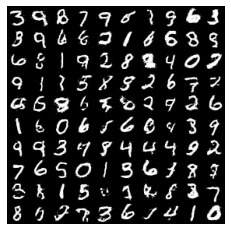

In [13]:
p_gen_data = op.flatten_and_fit_dims(p_gen)
collage = op.convert_data_to_collage(p_gen_data)
#fig = plt.figure(figsize=(12,12))
plt.imshow(collage, cmap=plt.cm.gray, norm=colors.Normalize(), vmin = 0, vmax = 255)
plt.axis('off')

plt.show()

In [14]:
amount = 100
gen_samples = model.transform(p_data, amount)


finished transforming at Layer: 0
finished transforming at Layer: 1
finished transforming at Layer: 2
finished transforming at Layer: 3
finished transforming at Layer: 4
finished transforming at Layer: 5
finished transforming at Layer: 6
finished transforming at Layer: 7
finished transforming at Layer: 8
finished transforming at Layer: 9
finished transforming at Layer: 10
finished transforming at Layer: 11
finished transforming at Layer: 12
finished transforming at Layer: 13


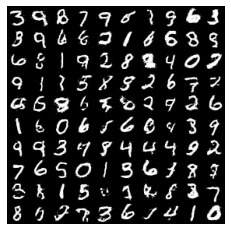

In [18]:

plt.imshow(collage, cmap=plt.cm.gray, norm=colors.Normalize(), vmin = 0, vmax = 255)
plt.axis('off')

plt.show()
#for i in range(amount):#np.random.choice(amount, 10):
#  plt.imshow(gen_samples[i, :, :], cmap=plt.cm.gray, norm=colors.Normalize(), vmin = 0, vmax = 255)
#  plt.axis('off')
#  plt.show()


In [ ]:
layers=model.get_layer_list()
lay1 = layers[0]
mat_list = lay1.get_proj_mat_list()
p_data_op = op.flatten_and_fit_dims(p_data)
C = np.cov(p_data_op)
w1 = op.gen_orthogonal_mat(p_data_op, C, random_state=mat_list[0])
w2 = op.gen_orthogonal_mat(p_data_op, C, random_state=mat_list[0])

p_data_rsz1 = lay1.data_size_fit(p_data)
p_data_rsz2 = lay1.data_size_fit(p_data)
np.all(p_data_rsz1 == p_data_rsz2)
#p_data_resize_1.shape

True

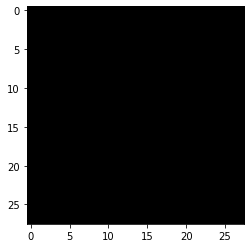

In [ ]:
plt.imshow(gen_samples[2,:,:], cmap=plt.cm.gray, norm=colors.Normalize(), vmin = 0, vmax = 255)
plt.show()